In [171]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math

In [172]:
df = pd.read_csv('./Pokemon.csv')
df2 =  df.sort_values("Type 1")

In [173]:
df2.head()
df2 = df[df['Type 1'] =='Water']
df_water_train = df2.iloc[0:60]
df_water_test = df2.iloc[60:112]

In [174]:
df3 = df[df['Type 1'] =='Normal']
df_Normal_train = df2.iloc[0:50]
df_Normal_test = df2.iloc[50:98]

In [186]:
df = df.iloc[0:400]

Total_mean = df.loc[df['Type 1'] == 'Normal','Total'].mean()
HP_mean = df.loc[df['Type 1'] == 'Normal','HP'].mean()
Attack_mean = df.loc[df['Type 1'] == 'Normal','Attack'].mean()
Defense_mean = df.loc[df['Type 1'] == 'Normal','Defense'].mean()
Sp_Atk_mean = df.loc[df['Type 1'] == 'Normal','Sp. Atk'].mean()
Sp_Def_mean = df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean()
Speed_mean = df.loc[df['Type 1'] == 'Normal','Speed'].mean()

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

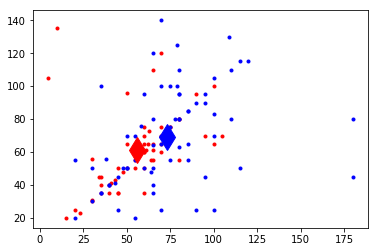

In [177]:
matrix_mean_water = [df.loc[df['Type 1'] == 'Water','Defense'].mean(),df.loc[df['Type 1'] == 'Water','Sp. Def'].mean()]
matrix_mean_normal= [df.loc[df['Type 1'] == 'Normal','Defense'].mean(),df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean()]

plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )

plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',
         matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,
        )

In [178]:
matrix_mean_water = [df.loc[df['Type 1'] == 'Water','Defense'].mean(),df.loc[df['Type 1'] == 'Water','Sp. Def'].mean()]
matrix_mean_normal= [df.loc[df['Type 1'] == 'Normal','Defense'].mean(),df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean()]

In [179]:
print('water mean',matrix_mean_water)
print('Normal mean',matrix_mean_normal)

water mean [73.31884057971014, 69.08695652173913]
Normal mean [56.12280701754386, 61.05263157894737]


In [180]:
#df[df['Type 1'] == 'Water']['Defense'].count
number_of_Water = (df['Type 1'] == 'Water').sum()
number_of_normal = (df['Type 1'] == 'Normal').sum()
number_of_total = number_of_Water + number_of_normal
P_c1 = number_of_Water/number_of_total
P_c2 = number_of_normal/number_of_total
print(P_c1)
print(P_c2)

0.5476190476190477
0.4523809523809524


# P(x|C1) Water Trainning model

In [181]:
Defense_matrix_water = np.array(df[df['Type 1'] == 'Water']['Defense']-matrix_mean_water[0])
Sp_Def_matrix_water = np.array(df[df['Type 1'] == 'Water']['Sp. Def']-matrix_mean_water[1])
combined_water = np.vstack((Defense_matrix_water, Sp_Def_matrix_water)).T
#x_matrix_water = np.mat(combined_water[0])
#np.dot(x_matrix_water.T,x_matrix_water)
x_matrix_total_water = np.zeros([2, 2]) 
for i in range(number_of_Water): 
    
    x_matrix_water = np.mat(combined_water[i])
    x_matrix_total_water = x_matrix_total_water + np.dot(x_matrix_water.T,x_matrix_water)
x_matrix_total_water = x_matrix_total_water/number_of_Water
x_matrix_total_water
inverse_water = np.linalg.inv(x_matrix_total_water)


# P(x|C2) Normal Trainning model

In [182]:
Defense_matrix_normal = np.array(df[df['Type 1'] == 'Normal']['Defense']-matrix_mean_normal[0])
Sp_Def_matrix_normal = np.array(df[df['Type 1'] == 'Normal']['Sp. Def']-matrix_mean_normal[1])
combined_normal = np.vstack((Defense_matrix_normal, Sp_Def_matrix_normal)).T
#x_matrix_normal = np.mat(combined_normal[0])
#np.dot(x_matrix.T,x_matrix)
x_matrix_total_normal = np.zeros([2, 2]) 
for i in range(number_of_normal): 
    
    x_matrix_normal = np.mat(combined_normal[i])
    x_matrix_total_normal = x_matrix_total_normal + np.dot(x_matrix_normal.T,x_matrix_normal)
x_matrix_total_normal = x_matrix_total_normal/number_of_normal
x_matrix_total_normal
inverse_normal = np.linalg.inv(x_matrix_total_normal)
accuracy = 0

# Classification

In [183]:
def Classification(x) : 
    x = np.mat(x)
    matrix_water = np.dot(np.dot((x-matrix_mean_water),inverse_water),(x-matrix_mean_water).T)
    P_x_C1 = math.exp(-0.5*matrix_water)/((np.linalg.det(x_matrix_total_water)**0.5)*(math.pi))
    matrix_normal = np.dot(np.dot((x-matrix_mean_normal),inverse_normal),(x-matrix_mean_normal).T)
    P_x_C2 = math.exp(-0.5*matrix_normal)/(((np.linalg.det(x_matrix_total_normal))**0.5)*(math.pi))
    
    probability_c1_x = P_x_C1*P_c1/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    probability_c2_x = P_x_C2*P_c2/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    '''
    print('matrix_water : ', matrix_water)
    print('matrix_normal : ', matrix_normal)
    
    print('P_x_C1 : ', P_x_C1)
    print('P_x_C2 : ', P_x_C2)   
    '''
    
    if probability_c1_x > probability_c2_x :
        print('water class probability : ',probability_c1_x)
    else:
        print('Normal class probability: ',probability_c2_x)
    
    return [probability_c1_x,probability_c2_x]
    #print(probability_c1_x)
    #print(probability_c2_x)

In [184]:
#x_test = [73.31884057971014,69.08695652173913]
Defense_matrix_water = np.array(df[df['Type 1'] == 'Water']['Defense']-matrix_mean_water[0])
Sp_Def_matrix_water = np.array(df[df['Type 1'] == 'Water']['Sp. Def']-matrix_mean_water[1])
combined_water = np.vstack((Defense_matrix_water, Sp_Def_matrix_water)).T

result = []

for i in range(number_of_normal): 
    result.append(Classification(combined_water[i]))

print(result)
print(result[0])
    

#print(result/number_of_Water)

water class probability :  0.6583914507248134
Normal class probability:  0.516482021702298
Normal class probability:  0.6512260606067843
Normal class probability:  0.6504267042076133
water class probability :  0.844064769161766
Normal class probability:  0.5054450768349216
water class probability :  0.9157668639005435
water class probability :  0.7407094514139329
Normal class probability:  0.6073874840690913
water class probability :  0.8905631223676841
water class probability :  0.6108577535916132
water class probability :  0.8044838332440849
Normal class probability:  0.5482173154116547
water class probability :  0.9680263323198094
water class probability :  0.71710131537975
Normal class probability:  0.5596732478279692
water class probability :  0.8880001475176875
water class probability :  0.9961030445791527
water class probability :  0.8740811209855808
water class probability :  0.7382604451552182
water class probability :  0.8814318216336265
water class probability :  0.716912399

In [203]:
a = Classification([df.iloc[9][7],df.iloc[9][9]])
a


Normal class probability:  0.5720717177548825


[0.4279282822451175, 0.5720717177548825]

In [201]:
df.head(50)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
